# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
from datetime import datetime

# Import API keys
from api_keys import g_key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Set latitude and longitude range
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Create lists for holding latlongs and cities
latlongs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
latlongs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for latlong in latlongs:
    city = citipy.nearest_city(latlong[0], latlong[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# put API key in for loop, request for every singly city

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q=London"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=3fb89facec5181e930a0dbfc6f663ba7&units=imperial&q=London


In [4]:
response = requests.get(query_url).json()
pprint(response)
print (len(response))

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1593272586,
 'id': 2643743,
 'main': {'feels_like': 58.06,
          'humidity': 63,
          'pressure': 1004,
          'temp': 66.15,
          'temp_max': 68,
          'temp_min': 64.99},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1593229521,
         'sunset': 1593289303,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 210, 'gust': 28.86, 'speed': 16.11}}
13


In [5]:
json.dumps(response,indent=4)

'{\n    "coord": {\n        "lon": -0.13,\n        "lat": 51.51\n    },\n    "weather": [\n        {\n            "id": 500,\n            "main": "Rain",\n            "description": "light rain",\n            "icon": "10d"\n        }\n    ],\n    "base": "stations",\n    "main": {\n        "temp": 66.15,\n        "feels_like": 58.06,\n        "temp_min": 64.99,\n        "temp_max": 68,\n        "pressure": 1004,\n        "humidity": 63\n    },\n    "visibility": 10000,\n    "wind": {\n        "speed": 16.11,\n        "deg": 210,\n        "gust": 28.86\n    },\n    "clouds": {\n        "all": 90\n    },\n    "dt": 1593272586,\n    "sys": {\n        "type": 1,\n        "id": 1414,\n        "country": "GB",\n        "sunrise": 1593229521,\n        "sunset": 1593289303\n    },\n    "timezone": 3600,\n    "id": 2643743,\n    "name": "London",\n    "cod": 200\n}'

In [6]:
# Create lists to store results

#Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude
weather_api_key = "3fb89facec5181e930a0dbfc6f663ba7"
citydata = []
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
for city in cities:
    city_url = query_url + "&q=" + city

    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    try:
        response = requests.get(city_url).json()
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]
        temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        windspeed = response["wind"]["speed"]
        date = response["dt"]
        country = response["sys"]["country"]
        
# citydata.append({"city":city,"lat":lat,"long":long,"temp_max":temp})
        citydata.append({"City": city, "Latitude": lat, "Longitude": long, "Max Temperature": temp, "Humidity": humidity,"Cloudiness": cloudiness, "Windspeed": windspeed, "Date": date, "Country": country})
        print(city)
    except:
        print(f"City not found: {city}")
        
        pass 


City not found: amderma
syumsi
svetlyy
husavik
saint-philippe
gazanjyk
vaini
provideniya
pudozh
albany
beian
sapa
schmalkalden
City not found: hunza
carnarvon
pangnirtung
dhidhdhoo
atuona
bluff
ushuaia
sur
egvekinot
City not found: tubruq
piacabucu
City not found: shchelyayur
smolenka
busselton
punta arenas
grindavik
kaitangata
saint george
mahebourg
yellowknife
smederevska palanka
ribeira grande
vanimo
barrow
zanesville
tasiilaq
port alfred
City not found: saleaula
butaritari
mataura
longkou
naro-fominsk
andenes
belmonte
abashiri
hilo
kodiak
rikitea
tommot
bemidji
honiara
taft
lida
new norfolk
qaqortoq
saskylakh
aksarka
City not found: toliary
okhotsk
katherine
akyab
qaanaaq
aklavik
City not found: artyk
port blair
diu
hobart
ponta do sol
shimoda
bengkulu
gravdal
City not found: fevralsk
City not found: tabiauea
dubbo
airai
souillac
carupano
hermiston
puerto ayora
luocheng
ndele
hit
cururupu
City not found: lenki
trinidad
havoysund
City not found: taolanaro
cape town
avarua
City not f

# Convert Raw Data to DataFrame
#*Export the city data into a .csv.
#* Display the DataFrame

In [8]:
weatherpydict = pd.DataFrame({"City": city,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windspeed,
                           "Latitude": lat,
                           "Longitude": long,
                           "Date": date}, index=[0])

In [9]:
# city_df=pd.DataFrame(citydata, columns=["city","cloudiness","country", "date","humidity","lat","lng","max temp","wind speed"])
city_df=pd.DataFrame(citydata)

In [10]:
# Export to csv
city_df.to_csv(r'/Users/eline/Documents/API-Challenge/WeatherPy/city_df.csv', index = False)
city_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Windspeed,Date,Country
0,syumsi,57.11,51.61,59.79,95,100,7.00,1593272831,RU
1,svetlyy,54.67,20.13,68.00,88,75,6.71,1593272831,RU
2,husavik,66.04,-17.34,48.20,81,90,9.17,1593272559,IS
3,saint-philippe,-21.36,55.77,71.60,73,20,5.82,1593272831,RE
4,gazanjyk,39.24,55.52,84.09,15,7,10.89,1593272831,TM
...,...,...,...,...,...,...,...,...,...
563,pocri,8.27,-80.55,78.35,87,100,5.64,1593272857,PA
564,kargil,34.57,76.10,58.59,37,5,9.84,1593272857,IN
565,wynyard,-41.00,145.72,37.99,91,60,3.00,1593272857,AU
566,asfi,32.30,-9.24,73.72,65,0,23.24,1593272858,MA


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
highhumidityDF = city_df[(city_df["Humidity"]>100)]
highhumidityDF

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Windspeed,Date,Country


In [12]:
#  Get the indices of cities that have humidity over 100%.
highhumidityDF.index

Int64Index([], dtype='int64')

In [13]:
city_df["Humidity"].count()

568

In [14]:
outliers_index = city_df[city_df["Humidity"] > 100].index

In [15]:
# Create new dataframe to drop humidity outliers (by index)
clean_city_data = city_df.drop(index=outliers_index)

In [16]:
# Extract relevant fields from the data frame

relevant_data = city_df[["City","Country", "Latitude", "Max Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]


# Export the relevant data into a csv

relevant_data.to_csv(r'/Users/eline/Documents/API-Challenge/WeatherPy/relevant_data.csv', index = False)
relevant_data.head()


,City,Country,Latitude,Max Temperature,Humidity,Cloudiness,Windspeed,Date
0,syumsi,RU,57.11,59.79,95,100,7.00,1593272831
1,svetlyy,RU,54.67,68.00,88,75,6.71,1593272831
2,husavik,IS,66.04,48.20,81,90,9.17,1593272559
3,saint-philippe,RE,-21.36,71.60,73,20,5.82,1593272831
4,gazanjyk,TM,39.24,84.09,15,7,10.89,1593272831


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

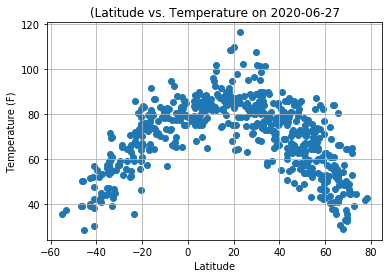

In [17]:
# Use max date in dataset as final date (date where plot was created form dataset) as plot titles

finalrundate = relevant_data["Date"].max()
enddate = datetime.utcfromtimestamp(finalrundate).strftime("%Y-%m-%d")

# Plot data, set x-axis and y-axis
x = relevant_data["Latitude"]
y = relevant_data["Max Temperature"]
plt.scatter(x,y)

# Add axis titles, labels, and gridlines to plot
plt.title(f"(Latitude vs. Temperature on {enddate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

# Export as .png file
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Latitude vs. Temperature on {enddate}.png')

# Show plot
plt.show()

## Latitude vs. Humidity Plot

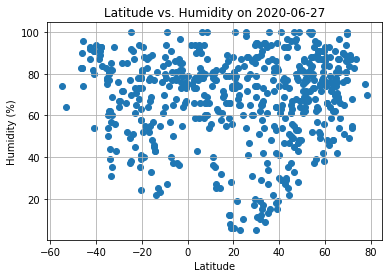

In [18]:
# Populate plot
hum = relevant_data["Humidity"]
# Use x cfr. Latitude vs. Temperature plot see supra
plt.scatter(x,hum)
# Add title, grids, and labels to plot
plt.title(f"Latitude vs. Humidity on {enddate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Export plot as .png file
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Latitude vs. Humidity on {enddate}.png')
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

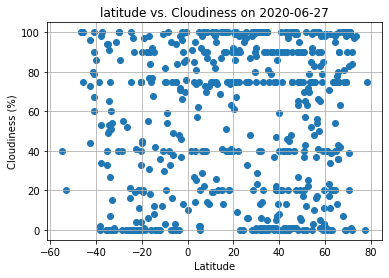

In [19]:
# Populate plot
clouds = relevant_data["Cloudiness"]
# Use x cfr. Latitude vs. Temperature plot see supra
plt.scatter(x, clouds)
# Add title, grids, and labels to plot
plt.title(f"latitude vs. Cloudiness on {enddate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Export plot as .png file
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Latitude vs. Cloudiness on {enddate}.png')
# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

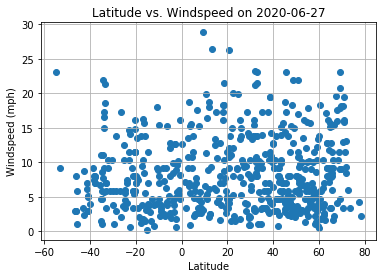

In [20]:
windspeed = relevant_data["Windspeed"]

# Use x cfr. Latitude vs. Temperature plot see supra
plt.scatter(x,windspeed)

# Add title, grid, and labels to plot
plt.title(f"Latitude vs. Windspeed on {enddate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

# Export plot as .png file
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Latitude vs. Wind Speed on {enddate}.png')

# Show plot
plt.show()

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots

# Name the function "LRfunction"
# Declare variables:
# x_values: first set of data
# y_values: second set of data
# equationlinex: where the linear regression equation appears on the plot x line
# equationliney: where the linear regression equation appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

# Function is "LRfunction"
def LRfunction(x_values, y_values, equationlinex, equationliney, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    eqline = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"R-squared is {rvalue}")
    print(eqline)
    plt.annotate(eqline,(equationlinex, equationliney), fontsize = 14, color = "blue")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()


In [22]:
# Create Northern and Southern Hemisphere DataFrames
# .Loc for cities above (Northern) and below (Southern) the equator (equator = latitude 0, cities with these coordinates are excluded from the dataframes)

northernDF = relevant_data.loc[relevant_data["Latitude"]>0]
southernDF = relevant_data.loc[relevant_data["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is -0.7248669938211701
y = -0.58x + 94.16


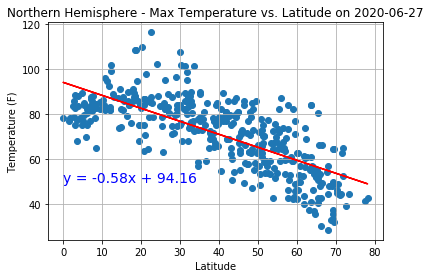

In [23]:
# Declare variables

x_values = northernDF["Latitude"]
y_values = northernDF["Max Temperature"]

# Define where equation appears on plot

equationlinex = 0
equationliney = 50

# Add title, label Y axis

plt.title(f"Northern Hemisphere - Max Temperature vs. Latitude on {enddate}")
y_label = "Temperature (F)"

LRfunction(x_values, y_values, equationlinex, equationliney, y_label)

# Export plot as .png file

plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Northern Hemisphere Max Temp vs. Latitude Linear Regression on {enddate}.png')

# Show Plot

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is 0.8219718436073994
y = 0.92x + 85.77


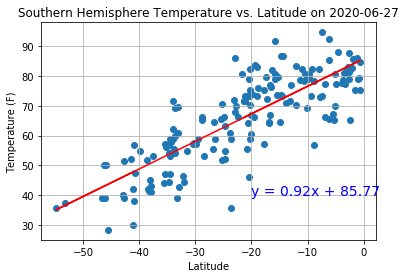

In [24]:
x_values = southernDF["Latitude"]
y_values = southernDF["Max Temperature"]
equationlinex = -20
equationliney = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Temperature vs. Latitude on {enddate}')
LRfunction(x_values, y_values, equationlinex, equationliney, y_label)
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Southern Hemisphere Latitude vs. Max Temperature Linear Regression on {enddate}.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is 0.12571123802989143
y = 0.14x + 62.1


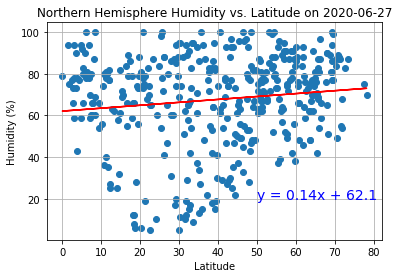

In [25]:
x_values = northernDF["Latitude"]
y_values = northernDF["Humidity"]
equationlinex = 50
equationliney = 20
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Humidity vs. Latitude on {enddate}')
LRfunction(x_values, y_values, equationlinex, equationliney, y_label)
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Northern Hemisphere Humidity vs. Latitude on {enddate}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is -0.16465169937811908
y = -0.23x + 64.48


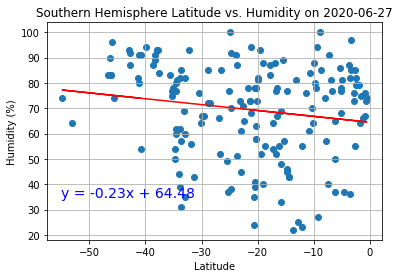

In [26]:
x_values = southernDF["Latitude"]
y_values = southernDF["Humidity"]
equationlinex = -55
equationliney = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs. Humidity on {enddate}')
LRfunction(x_values, y_values, equationlinex, equationliney, y_label)
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Northern Hemisphere Latitude vs. Humidity on {enddate}.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared is -0.059340966719280866
y = -0.11x + 58.79


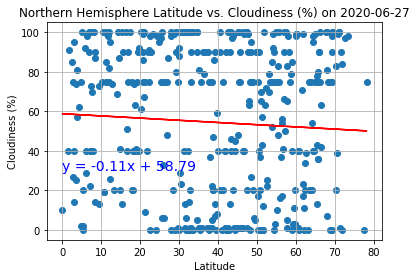

In [27]:
x_values = northernDF["Latitude"]
y_values = northernDF["Cloudiness"]
equationlinex = 0
equationliney = 30
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs. Cloudiness (%) on {enddate}')
LRfunction(x_values, y_values, equationlinex, equationliney, y_label)
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Northern Hemisphere Latitude vs. Cloudiness on {enddate}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared is -0.018660374690624613
y = -0.05x + 46.91


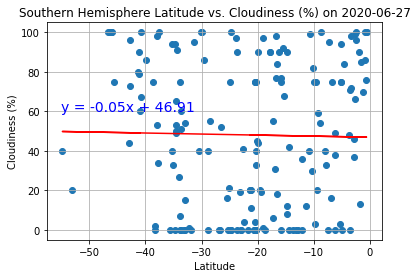

In [28]:
x_values = southernDF["Latitude"]
y_values = southernDF["Cloudiness"]
equationlinex = -55
equationliney = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs. Cloudiness (%) on {enddate}')
LRfunction(x_values, y_values, equationlinex, equationliney, y_label)
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Northern Hemisphere Latitude vs. Cloudiness on {enddate}.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared is -0.011196568771062386
y = -0.0x + 8.86


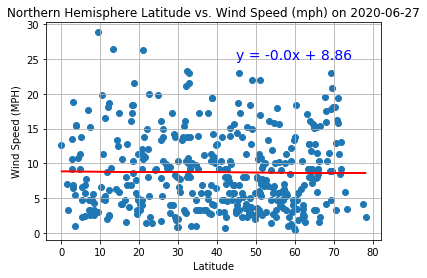

In [29]:
x_values = northernDF["Latitude"]
y_values = northernDF["Windspeed"]
equationlinex = 45
equationliney = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs. Wind Speed (mph) on {enddate}')
LRfunction(x_values, y_values, equationlinex, equationliney, y_label)
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Northern Hemisphere Latitude vs. Wind Speed (mph) on {enddate}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared is -0.06504720068100452
y = -0.02x + 6.85


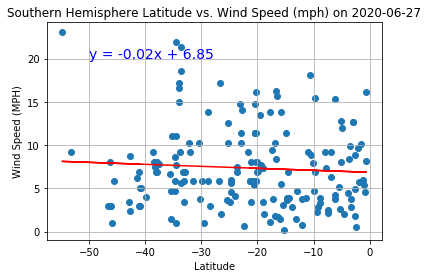

In [30]:
x_values = southernDF["Latitude"]
y_values = southernDF["Windspeed"]
equationlinex = -50
equationliney = 20
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs. Wind Speed (mph) on {enddate}')
LRfunction(x_values, y_values, equationlinex, equationliney, y_label)
plt.savefig(r'/Users/eline/Documents/API-Challenge/WeatherPy/Northern Hemisphere Latitude vs. Wind Speed (mph) on {enddate}.png')
plt.show()